## DATA ANALYSIS

16th March

The goal of this notebook is creating a CNN to analyse previously produced data.

### Packages

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D


## DATA renormalization

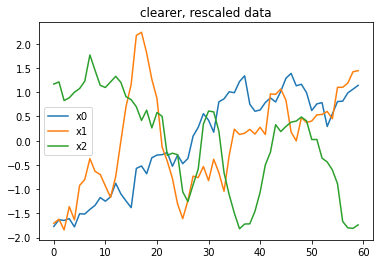

[1. 0. 0.]
10000 8000 2000 60


In [2]:
str0 = 'ts_L60_Z12_A500_DX50_bias5_N10000'
fnamex = 'DATA/x_'+str0+'.csv'
fnamey = 'DATA/y_'+str0+'.csv'

x = np.loadtxt(fnamex, delimiter = ',', dtype = float)
N = len(x)

xm = x.mean(axis = 1)
stdx = x.std(axis = 1)
for n in range(N):
    x[n] -= xm[n]
    x[n] /= stdx[n]
    
plt.plot(x[0], label='x0')
plt.plot(x[1], label='x1')
plt.plot(x[2], label='x2')
plt.title('clearer, rescaled data')
plt.legend()
plt.show()    


categ = np.loadtxt(fnamey, delimiter = ',', dtype = int)
N_categ = np.max(categ)+1
y = np.zeros((N,N_categ))
for n in range(N):
    y[n][categ[n]] = 1             #one-hot encoding
print(y[0])


perc_train = 0.8                    
N_train = int(N*perc_train)
N_val = N - N_train

x_train, y_train = x[:N_train], y[:N_train]
x_val, y_val = x[N_train:], y[N_train:]

L = len(x[0])
print(N,N_train, N_val,L)


x_train = x_train.reshape(x_train.shape[0],L,1)    #reshaping
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

In [3]:
from keras import initializers, regularizers
reg = regularizers.l2(0.01)    #LASSO, lambda = 10e-4
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = Sequential()
model.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 11,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                ))
model.add(AveragePooling1D(5))                          #Reduce 5 -> 1

model.add(Conv1D(                                       #Second layer
                filters = 5,
                kernel_size = 7,
                activation = 'relu'
                ))
model.add(Flatten())                                      #Move to GNN
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(N_categ,activation = 'softmax'))

print(model.summary())   #Notice how few parameters!

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d (AveragePo (None, 10, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 5)              180       
_________________________________________________________________
flatten (Flatten)            (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [4]:
from keras import optimizers
opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])

In [5]:
model.save_weights('initial.h5')

In [6]:
batch_size = 250
epochs = 100
fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data = (x_val,y_val), verbose = 2)

Epoch 1/100
32/32 - 1s - loss: 1.0998 - accuracy: 0.3304 - val_loss: 1.0990 - val_accuracy: 0.3350
Epoch 2/100
32/32 - 0s - loss: 1.0966 - accuracy: 0.3720 - val_loss: 1.0965 - val_accuracy: 0.3655
Epoch 3/100
32/32 - 0s - loss: 1.0924 - accuracy: 0.3849 - val_loss: 1.0886 - val_accuracy: 0.3890
Epoch 4/100
32/32 - 0s - loss: 1.0845 - accuracy: 0.3906 - val_loss: 1.0793 - val_accuracy: 0.4200
Epoch 5/100
32/32 - 0s - loss: 1.0712 - accuracy: 0.4214 - val_loss: 1.0647 - val_accuracy: 0.4480
Epoch 6/100
32/32 - 0s - loss: 1.0540 - accuracy: 0.4507 - val_loss: 1.0414 - val_accuracy: 0.4720
Epoch 7/100
32/32 - 0s - loss: 1.0275 - accuracy: 0.4765 - val_loss: 1.0099 - val_accuracy: 0.5060
Epoch 8/100
32/32 - 0s - loss: 0.9936 - accuracy: 0.5141 - val_loss: 0.9748 - val_accuracy: 0.5395
Epoch 9/100
32/32 - 0s - loss: 0.9622 - accuracy: 0.5354 - val_loss: 0.9334 - val_accuracy: 0.5765
Epoch 10/100
32/32 - 0s - loss: 0.9252 - accuracy: 0.5667 - val_loss: 0.8899 - val_accuracy: 0.6095
Epoch 11/

32/32 - 0s - loss: 0.5402 - accuracy: 0.8000 - val_loss: 0.5598 - val_accuracy: 0.7890
Epoch 84/100
32/32 - 0s - loss: 0.5356 - accuracy: 0.8060 - val_loss: 0.5457 - val_accuracy: 0.7945
Epoch 85/100
32/32 - 0s - loss: 0.5362 - accuracy: 0.8002 - val_loss: 0.5507 - val_accuracy: 0.7950
Epoch 86/100
32/32 - 0s - loss: 0.5356 - accuracy: 0.8084 - val_loss: 0.5414 - val_accuracy: 0.7950
Epoch 87/100
32/32 - 0s - loss: 0.5343 - accuracy: 0.8055 - val_loss: 0.5389 - val_accuracy: 0.7960
Epoch 88/100
32/32 - 0s - loss: 0.5342 - accuracy: 0.8024 - val_loss: 0.5421 - val_accuracy: 0.7985
Epoch 89/100
32/32 - 0s - loss: 0.5311 - accuracy: 0.8062 - val_loss: 0.5387 - val_accuracy: 0.7985
Epoch 90/100
32/32 - 0s - loss: 0.5273 - accuracy: 0.8055 - val_loss: 0.5408 - val_accuracy: 0.7990
Epoch 91/100
32/32 - 0s - loss: 0.5270 - accuracy: 0.8033 - val_loss: 0.5347 - val_accuracy: 0.8010
Epoch 92/100
32/32 - 0s - loss: 0.5252 - accuracy: 0.8085 - val_loss: 0.5356 - val_accuracy: 0.8005
Epoch 93/100


As we can see now the performance are really better!

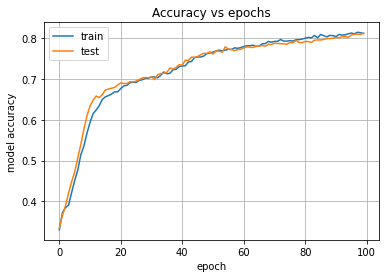

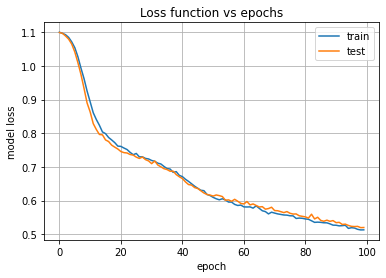

In [7]:
#Plot

# accuracy
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Accuracy vs epochs')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()
# loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Loss function vs epochs')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()

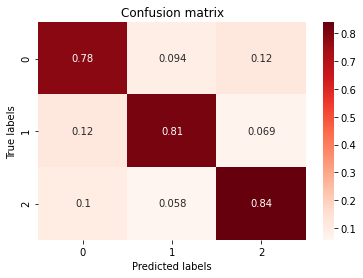

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_val  = model.predict(x_val)
#take the class with the highest probability from the val predictions
max_y_pred_val = np.argmax(y_pred_val, axis=1)
max_y_val = np.argmax(y_val, axis=1)
confusion_Oz = confusion_matrix(max_y_pred_val,max_y_val, normalize='true') 
sns.heatmap(confusion_Oz, annot = True, cmap = plt.cm.Reds, fmt = '.2g')

plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.title('Confusion matrix')
plt.show()

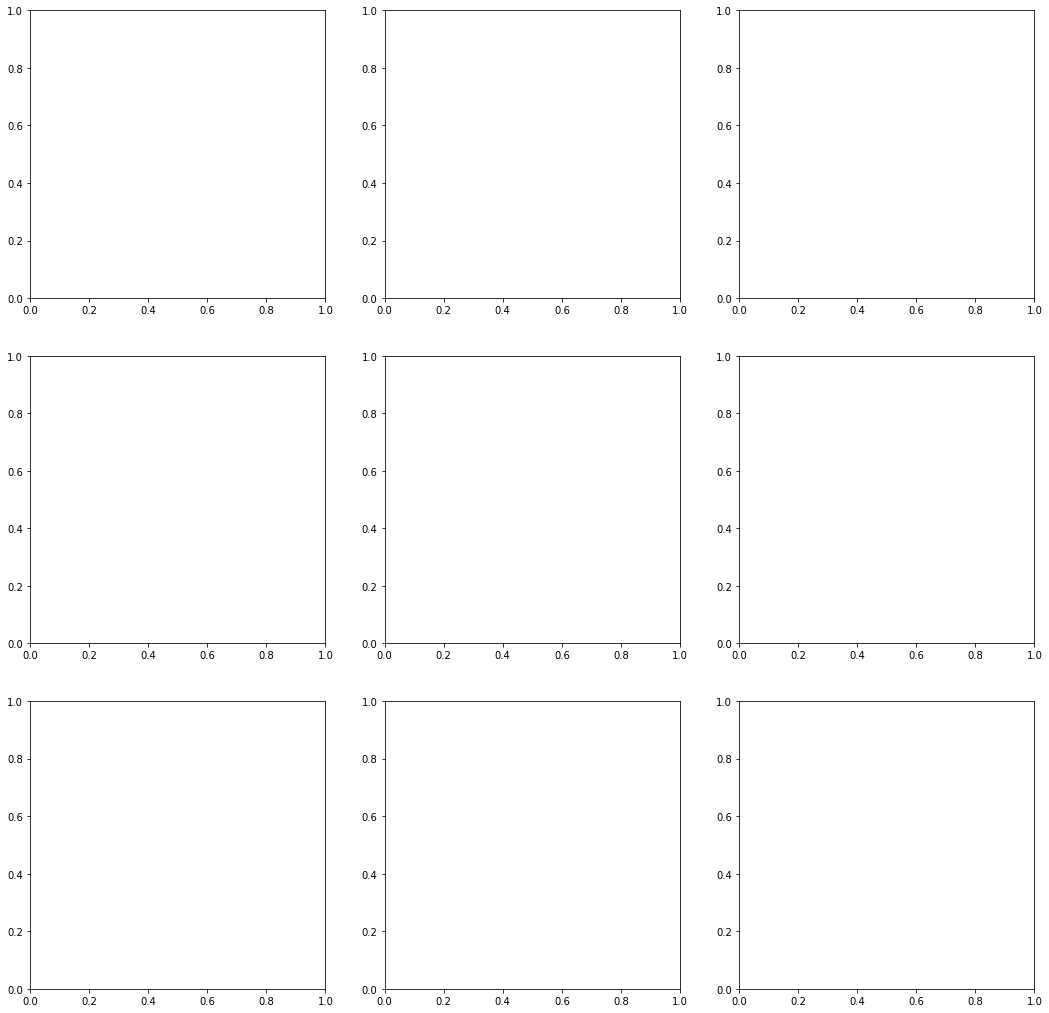

In [9]:
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5),(ax6,ax7,ax8)) = plt.subplots(3, 3, figsize=(18,18))
axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

In [14]:
from tqdm import tqdm

Ass = np.arange(50,500,50)
scores = {}
idx = 0
for a in tqdm(Ass):
    str0 = f'ts_L60_Z12_A{a}_DX50_bias5_N10000'
    fnamex = 'DATA/x_'+str0+'.csv'
    fnamey = 'DATA/y_'+str0+'.csv'
    
    x = np.loadtxt(fnamex, delimiter = ',', dtype = float)
    N = len(x)

    xm = x.mean(axis = 1)
    stdx = x.std(axis = 1)
    for n in range(N):
        x[n] -= xm[n]
        x[n] /= stdx[n]

    categ = np.loadtxt(fnamey, delimiter = ',', dtype = int)
    N_categ = np.max(categ)+1
    y = np.zeros((N,N_categ))
    for n in range(N):
        y[n][categ[n]] = 1             

    perc_train = 0.8                    
    N_train = int(N*perc_train)
    N_val = N - N_train

    x_train, y_train = x[:N_train], y[:N_train]
    x_val, y_val = x[N_train:], y[N_train:]

    L = len(x[0])

    x_train = x_train.reshape(x_train.shape[0],L,1)   
    x_val = x_val.reshape(x_val.shape[0],L,1)
    input_shape = (L,1)
    
    
    
    model.load_weights('initial.h5')
    fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                    validation_data = (x_val,y_val), verbose = 0)
    scores[a] = np.mean(fit.history['accuracy'][-20:])
    
    y_pred_val  = model.predict(x_val)
    max_y_pred_val = np.argmax(y_pred_val, axis=1)
    max_y_val = np.argmax(y_val, axis=1)
    confusion_Oz = confusion_matrix(max_y_pred_val,max_y_val, normalize='true') 
 
    ax = axs[idx]
    g = sns.heatmap(confusion_Oz, annot = True, cmap = plt.cm.Reds, cbar=False, fmt = '.2g', ax=ax)
    g.set_ylabel('True')
    g.set_xlabel('Predicted')
    g.set_title(f'A={a}')
    
    idx += 1

print(scores)   

100%|██████████| 9/9 [02:31<00:00, 16.88s/it]

{50: 0.35135000199079514, 100: 0.3696562498807907, 150: 0.3822562500834465, 200: 0.4114000007510185, 250: 0.440912501513958, 300: 0.5290750026702881, 350: 0.6129000067710877, 400: 0.5796937495470047, 450: 0.7421500027179718}


In [11]:
for k in scores.keys():
    print('Score with A = ', k, ' is ', scores[k])

Score with A =  50  is  0.34645000100135803
Score with A =  100  is  0.373031248152256
Score with A =  150  is  0.39523124843835833
Score with A =  200  is  0.3986437454819679
Score with A =  250  is  0.47345625311136247
Score with A =  300  is  0.5089499950408936
Score with A =  350  is  0.5570687502622604
Score with A =  400  is  0.6181812554597854
Score with A =  450  is  0.64660624563694


In [12]:
plt.show()

In [ ]:
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)
fig.colorbar(im, cax=cbar_ax)

In [13]:
!mkdir MODEL
fname ='MODEL/model'+str0+'.h5'
model.save(fname, save_format='h5')

model2 = keras.models.load_model(fname)
yhat_val = np.argmax(model2.predict(x_val), axis=-1)
ytrue_val = np.argmax(y_val, axis=-1)

for n in range(20):
    print(y_val[n], ytrue_val[n], yhat_val[n])

[0. 0. 1.] 2 2
[1. 0. 0.] 0 2
[0. 1. 0.] 1 1
[0. 0. 1.] 2 1
[1. 0. 0.] 0 0
[0. 1. 0.] 1 1
[0. 0. 1.] 2 2
[1. 0. 0.] 0 0
[0. 1. 0.] 1 1
[0. 0. 1.] 2 0
[1. 0. 0.] 0 1
[0. 1. 0.] 1 1
[0. 0. 1.] 2 0
[1. 0. 0.] 0 1
[0. 1. 0.] 1 1
[0. 0. 1.] 2 2
[1. 0. 0.] 0 1
[0. 1. 0.] 1 1
[0. 0. 1.] 2 2
[1. 0. 0.] 0 2
